In [139]:
# Analysing Premarket watch excel file and building a Strategy

In [140]:
!pip install numpy 
!pip install pandas
!pip install datetime
!pip install matplotlib.pyplot as plt
!pip install mplfinance as mpf
!pip install seaborn as sns
!pip install talib as ta
!pip install math

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot
ERROR: No matching distribution found for matplotlib.pyplot


ERROR: Could not find a version that satisfies the requirement talib
ERROR: No matching distribution found for talib
ERROR: Could not find a version that satisfies the requirement math
ERROR: No matching distribution found for math


In [141]:
# import libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import talib as ta

In [142]:
df1=pd.read_csv('D:\\Python\\Abishek Bhanushali\\Nifty500 list\\ind_nifty500list.csv')
df1

,Company Name,Industry,Symbol,Series,ISIN Code
0,3M India Ltd.,CONSUMER GOODS,3MINDIA,EQ,INE470A01017
1,ABB India Ltd.,INDUSTRIAL MANUFACTURING,ABB,EQ,INE117A01022
2,ABB Power Products and Systems India Ltd.,INDUSTRIAL MANUFACTURING,POWERINDIA,EQ,INE07Y701011
3,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,INDUSTRIAL MANUFACTURING,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
496,Yes Bank Ltd.,FINANCIAL SERVICES,YESBANK,EQ,INE528G01035
497,Zee Entertainment Enterprises Ltd.,MEDIA ENTERTAINMENT & PUBLICATION,ZEEL,EQ,INE256A01028
498,Zensar Technolgies Ltd.,IT,ZENSARTECH,EQ,INE520A01027
499,Zydus Wellness Ltd.,CONSUMER GOODS,ZYDUSWELL,EQ,INE768C01010


In [143]:
df1.count()

Company Name    501
Industry        501
Symbol          501
Series          501
ISIN Code       501
dtype: int64

In [144]:
!pip install yfinance

In [145]:
import yfinance as yf

In [146]:
# Downloading 3M India company from Yahoo Finance
df= yf.download("3MINDIA.NS", period ="7d", interval="1m")

[*********************100%***********************]  1 of 1 completed


In [147]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-05-20 09:15:00+05:30,26000.000000,26197.849609,26000.000000,26065.050781,26065.050781,0
2021-05-20 09:16:00+05:30,26000.000000,26108.599609,26000.000000,26000.150391,26000.150391,7
2021-05-20 09:17:00+05:30,26040.500000,26100.000000,26040.500000,26100.000000,26100.000000,23
2021-05-20 09:18:00+05:30,26100.000000,26142.699219,26100.000000,26142.699219,26142.699219,9
2021-05-20 09:19:00+05:30,26142.750000,26142.750000,26100.000000,26100.000000,26100.000000,22
...,...,...,...,...,...,...
2021-05-28 15:26:00+05:30,25150.150391,25298.000000,25150.150391,25252.000000,25252.000000,162
2021-05-28 15:27:00+05:30,25245.000000,25250.000000,25200.050781,25250.000000,25250.000000,135
2021-05-28 15:28:00+05:30,25273.949219,25274.000000,25250.000000,25250.000000,25250.000000,99


In [148]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000,1845.000000
mean,26198.553464,26209.017615,26186.767906,26197.333278,26197.333278,21.138753
std,355.343442,356.361181,354.671491,355.070671,355.070671,78.794588
min,24999.949219,25000.000000,24970.349609,24999.949219,24999.949219,0.000000
25%,25900.050781,25931.550781,25892.000000,25906.050781,25906.050781,2.000000
50%,26236.000000,26244.949219,26224.000000,26230.000000,26230.000000,4.000000
75%,26397.000000,26400.000000,26383.949219,26394.400391,26394.400391,13.000000
max,27105.000000,27189.949219,26988.449219,27100.000000,27100.000000,1610.000000


In [149]:
df.skew()

Open         -0.150045
High         -0.110270
Low          -0.204760
Close        -0.157248
Adj Close    -0.157248
Volume       11.922212
dtype: float64

In [150]:
df.kurtosis()

Open          -0.174270
High          -0.177775
Low           -0.117822
Close         -0.153723
Adj Close     -0.153723
Volume       188.526273
dtype: float64

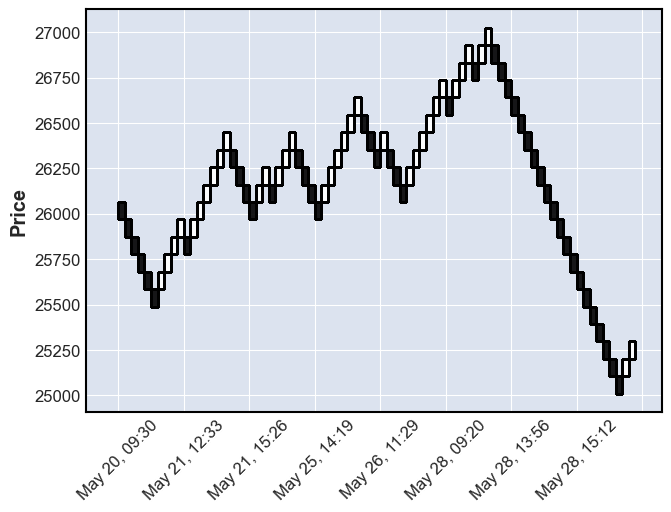

In [151]:
mpf.plot(df,type='renko')

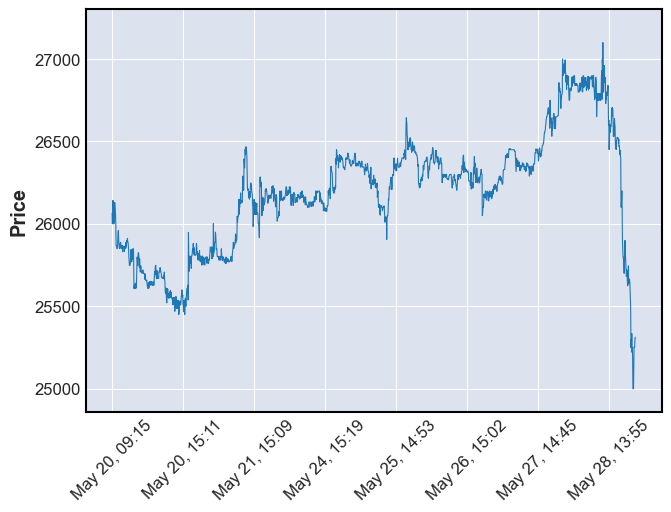

In [152]:
mpf.plot(df,type='line') 

C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


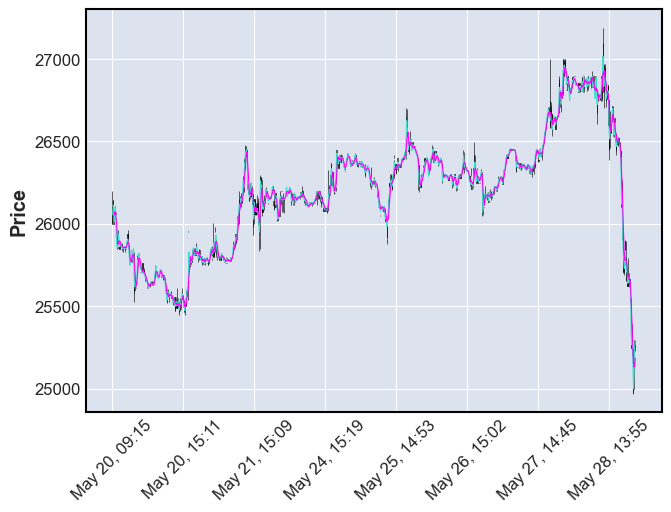

In [153]:
mpf.plot(df,type='candle',mav=(3,8))

C:\Users\Admin\anaconda3\envs\Oanda1\lib\site-packages\mplfinance\_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


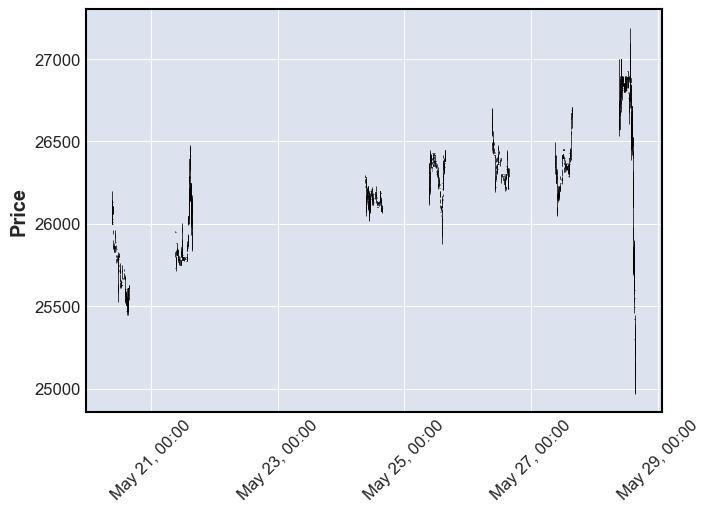

In [154]:
mpf.plot(df,type='ohlc',show_nontrading=True)

In [155]:
#Writing a strategy to code to generate a buy and sell signal as per guidelines
# 1 . Moving average crossover 3, 8 , if 3 is above 8 , buy signal
# 2. If 8 Moving Average above 3, generate a sell signal
# 3. Crosscheck with RVI for 3 candlesticks. If RVI line is above signal line , above o line, buy signal
# 4.  If RVI line is below signal line , below o line, sell signal
# 5.  Stop loss at 1.5 ATR(7 candlesticks)
# 6. Take profit @ 3 ATR
# 7. Chart 5 minutes
# 8. Backtest for 1 year.
# 9. Calculate profits and SHarpe ratio
# 10. Run real time


In [156]:
# Find the values for 3 and 8 Moving Averages.

In [157]:
import talib

In [158]:
print(talib)

<module 'talib' from 'C:\\Users\\Admin\\anaconda3\\envs\\Oanda1\\lib\\site-packages\\talib\\__init__.py'>


In [159]:
#dir(talib)

In [160]:
#?talib.CCI

In [161]:
# Extraction values of SMA 3 and SMA 8 

In [162]:
# Extracting 3 sma using talib library
sma3 = talib.SMA(df['Close']).values, 3

In [163]:
# Printing tuple sma8
sma3

(array([           nan,            nan,            nan, ...,
        25434.91341146, 25421.89674479, 25408.32005208]),
 3)

In [164]:
# # Extracting 8 sma using talib library
sma8 = talib.SMA(df['Close']).values,8

In [165]:
# Printing tuple sma8
sma8

(array([           nan,            nan,            nan, ...,
        25434.91341146, 25421.89674479, 25408.32005208]),
 8)

In [166]:
# Converting tuple to numpy pandas = 3 sma
for i in range(len(sma3)):
    print(" sma3 =   ", sma3[i])    

 sma3 =    [           nan            nan            nan ... 25434.91341146
 25421.89674479 25408.32005208]
 sma3 =    3


In [167]:
# Converting tuple to numpy pandas =8 sma
for i in range(len(sma8)):
    print(" sma8 =   ", sma8[i])
    

 sma8 =    [           nan            nan            nan ... 25434.91341146
 25421.89674479 25408.32005208]
 sma8 =    8


In [168]:
# Extarcting first element form the list
k =sma3[0]
l =sma8[0]

In [169]:
# Printing sma3 elements
k

array([           nan,            nan,            nan, ...,
       25434.91341146, 25421.89674479, 25408.32005208])

In [170]:
# Printing sma8 elements
l

array([           nan,            nan,            nan, ...,
       25434.91341146, 25421.89674479, 25408.32005208])

In [171]:
print(type(k))

<class 'numpy.ndarray'>


In [172]:
# Coverting Numpy to dataframe
df3 = pd.DataFrame(k)
df8 = pd.DataFrame(l)

In [173]:
# Printing dataframe of 3 sma
df3

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1840,25467.195052
1841,25450.528385
1842,25434.913411
1843,25421.896745


In [174]:
# handling the missing data
df3.isnull().sum()

0    29
dtype: int64

In [175]:
# handling the missing data
df8.isnull().sum()

0    29
dtype: int64

In [176]:
# Filling missing NAN values with mean values
3smamean = df3['0'].mean()
df3['0'] = df3['0'].replace(np.NaN,3smamean)
8smamean = df8['0'].mean()
df8['0'] = df8['0'].replace(np.NaN,8smamean)


SyntaxError: invalid syntax (<ipython-input-176-c4e554dbeb50>, line 2)

In [ ]:
# Checking nan values are absent or not
# handling the missing data
df3.isnull().sum()

In [ ]:
# Checking nan values are absent or not
# handling the missing data
df8.isnull().sum()

In [ ]:
# Printing dataframe of 3 sma
df3

In [ ]:
# Printing dataframe of 8 sma
df3

In [ ]:
print(type(sma3))
print(type(sma8))
print(type(k))
print(type(l))
print(type(df3))
print(type(df8))

In [ ]:
# Check when 2 sma if greater than or less than 3sma, print a buy signal or else print a sell signal.

In [ ]:
# Using a for loop to comapre 3sma with 8sma and generating a signal.
for i in range(len(df3)):
    if (df3[i] > df8[i]):
        print(" Buy Signal")
    else:
        print('Sell signal')